## 5장. 통계적 추론

### 5.1. 점추정

표본평균은 모평균의 불편추정량
표본분산은 모분산의 불편추정량

예) 다음의 표는 어떤 과즙의 당분 함량을 화학분석에 의해 얻은 것이다. 이로부터 당분의 (모)평균함량, (모)표준편차를 추정해보자.
> 주어진 표본의 표본평균과 표본표준편차를 통해 추정할 수 있음.

In [2]:
import numpy as np
x = np.array([14.0, 14.2, 15.1, 13.7, 14.5, 15.6, 14.8, 15.1, 13.5, 15.8])
print(x.mean())
print(x.std(ddof = 1))

14.63
0.783226943129796


In [3]:
# 표본분산: n-1으로 나눈 값
# std(ddof = 1)
np.sqrt( ((x - x.mean())**2).sum() / 9 )

0.783226943129796

In [4]:
# 모분산: n으로 나눈 값
# std(ddof = 0)
np.sqrt( ((x - x.mean())**2).sum() / 10 )

0.7430343195303971

### 5.2. 구간추정

- `ppf(q, loc, scale)` : 정규분포의 100 * (1-alpha) 분위수


In [5]:
from scipy.stats import norm

np.random.seed(1)

alpha = 0.05
mu = 0
sigma = 1

size = 50

count = 0
n = norm(loc = mu, scale = sigma)

for i in range(1000):
    x = n.rvs(size = size)
    upper = x.mean() + n.ppf(1 - alpha/2) * (sigma/np.sqrt(size))
    lower = x.mean() - n.ppf(1 - alpha/2) * (sigma/np.sqrt(size))
    
    if (lower < mu) & (mu < upper):
        count = count + 1
        
print(count / 1000)

0.952


### 5.3. 가설 검정

In [6]:
# "1500보다 크다" 주장
sd = 100
n = 25
xbar = 1550
mu = 1500

z0 = (xbar - mu) / (sd / np.sqrt(n))

CR = norm.ppf(0.95, loc = 0, scale = 1) # critical region (기각역)

p_val = 1 - norm.cdf(z0, loc = 0, scale = 1)

print(" z0 = %.3f \n critical region: >= %.3f \n p-value = %.3f" % (z0, CR, p_val))

 z0 = 2.500 
 critical region: >= 1.645 
 p-value = 0.006


In [7]:
# 예
sd = 10
n = 15
xbar = 294.4
mu = 300

z0 = (xbar - mu) / (sd / np.sqrt(n))

CR = norm.ppf(0.95, loc = 0, scale = 1) # critical region (기각역)

p_val = 1 - norm.cdf(z0, loc = 0, scale = 1)

print(" z0 = %.3f \n critical region: <= -%.3f \n p-value = %.3f" % (z0, CR, p_val))

 z0 = -2.169 
 critical region: <= -1.645 
 p-value = 0.985


### 5.4. 자료를 이용한 예제

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

data = pandas.read_csv("ames_2.csv")
livarea = data["Gr.Liv.Area"]
data.head(5)

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**예제 1**

In [9]:
from scipy.stats import norm
import numpy as np

pop_mean = livarea.mean()
pop_std = livarea.std()

print( pop_mean )
print( pop_std**2 )

1499.6904436860068
255539.2353132209


In [10]:
# pop
print( livarea.std(ddof = 0) )
print( np.std(livarea) )

# sample
print( livarea.describe() )
print( livarea.std() )
print( np.std(livarea, ddof = 1) )

505.4226157950803
505.4226157950803
count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64
505.5088874720413
505.5088874720413


**예제 2**

In [11]:
np.random.seed(1)
n = 60

sample = livarea.sample(n)

print(sample.mean())

1499.4833333333333


**예제 3**

신뢰구간이 모평균을 포함한다

In [12]:
alpha = 0.05
standard = norm(loc = 0, scale = 1)

upper = sample.mean() + standard.ppf(1 - alpha/2) * (pop_std/np.sqrt(n))
lower = sample.mean() - standard.ppf(1 - alpha/2) * (pop_std/np.sqrt(n))
    
print("(", lower, ", ", upper, ")")

( 1371.5742869027151 ,  1627.3923797639516 )


In [13]:
upper = []
lower = []
count = 0

for i in range(50):
    sample = np.random.choice( livarea, n )
    upper.append( sample.mean() + standard.ppf(1 - alpha/2) * (pop_std/np.sqrt(n)) )
    lower.append( sample.mean() - standard.ppf(1 - alpha/2) * (pop_std/np.sqrt(n)) )

lo = np.array(lower)
hi = np.array(upper)
m = livarea.mean()

y = np.array([lo, hi]).T
print([lo, hi])
print(y[:5]) # check five in the front
print(y[0])

[array([1353.79095357, 1452.40762024, 1419.05762024, 1372.4242869 ,
       1331.19095357, 1355.4742869 , 1418.55762024, 1392.5242869 ,
       1403.9742869 , 1305.64095357, 1515.44095357, 1254.45762024,
       1404.80762024, 1166.7242869 , 1483.90762024, 1302.4742869 ,
       1389.74095357, 1449.44095357, 1409.84095357, 1360.7242869 ,
       1421.0242869 , 1363.8742869 , 1433.99095357, 1280.25762024,
       1408.99095357, 1400.19095357, 1348.8742869 , 1369.25762024,
       1326.04095357, 1341.69095357, 1377.5742869 , 1410.30762024,
       1351.74095357, 1411.1242869 , 1307.7242869 , 1312.45762024,
       1389.40762024, 1336.90762024, 1489.55762024, 1300.75762024,
       1374.15762024, 1363.44095357, 1408.45762024, 1425.55762024,
       1355.0242869 , 1309.7242869 , 1305.4242869 , 1380.6742869 ,
       1415.09095357, 1351.15762024]), array([1609.60904643, 1708.2257131 , 1674.8757131 , 1628.24237976,
       1587.00904643, 1611.29237976, 1674.3757131 , 1648.34237976,
       1659.79237976, 

* `plt.vlines(xpos, ypos, length, color, linestyle)` : 수직선 만들기
    * 시작점이 (m, -2)
* `plt.axis("off")` : 축 제거
* `plt.text(xpos, ypos, text)`: 글씨 쓰기
    * `xpos = m * 0.99` : 모평균보다 살짝 작게 쓰려고
    * `ypos = -3`
    * `$\mu$`: 뮤 기호 출력

In [14]:
import matplotlib.pyplot as plt

def plot_ci(lo, hi, m):
    
    k = len(lo)
    
    plt.figure(figsize = (10, 6), dpi = 80)
    plt.vlines(m, -2, 41 * k / 40, color = "C0", linestyle = "--")
    
    # SIMPLE VER
    plt.axis("off")
    # COMPLEX VER
#     plt.xticks([])
#     plt.yticks([])
    
#     ax = plt.gca()
#     ax.spines['right'].set_color('none')
#     ax.spines['left'].set_color('none')
#     ax.spines['top'].set_color('none')
#     ax.spines['bottom'].set_color('none')
    
    # SIMPLE VER
    plt.text(m * 0.99, -3, '$\mu$ = %.3f' % m)
    # COMPLEX VER
#     plt.annotate(r '$\mu = %s$' % round(m, 3), 
#                 xy = (m, 0),
#                 xcoords = "data",
#                 xytext = (m-25, -30),
#                 fontsize = 14,
#                 textcoords = 'offset points')
            
    # 50 * 2 행렬 생성
    y = np.array([lo, hi]).T
    
    for i in range(k):
        ci = y[i] # [lower bound, upper bound]
        mean = y[i].mean() # 표본평균과 동일
        
        # red dashed line
        if (lo[i] > m) or (m > hi[i]):
            plt.plot(mean, i, "C3o")
            plt.hlines(y = i, xmin = ci[0], xmax = ci[1], colors = 'r', linestyles = "dashed")
        
        # black line with orange dot
        else:
            plt.plot(mean, i, "C1o")
            plt.hlines(y = i, xmin = ci[0], xmax = ci[1])
            
    plt.show()

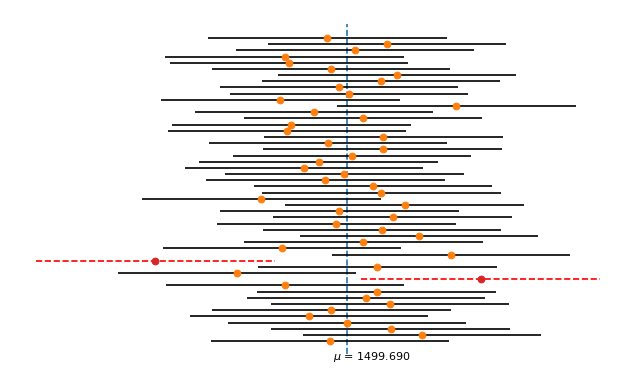

In [15]:
plot_ci(lo, hi, m)

In [27]:
import pandas as pd 
data = pd.read_csv("ames.csv")
livarea = data["Gr.Liv.Area"]

print( livarea.mean() )
print( livarea.std(ddof = 0) ** 2 )
print( np.std(livarea) ** 2 )

1499.6904436860068
255452.02055714134
255452.02055714134
